In [3]:
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Print all columns of the tips dataset
print("Columns of the tips dataset:")
print(tips.columns)
print(tips.head())


Columns of the tips dataset:
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
import pandas as pd

# Assuming 'tips' is your DataFrame
# Use one-hot encoding for 'sex', 'smoker', and 'day'
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day'], drop_first=True)

# Display the updated DataFrame
print(tips_encoded.head())


   total_bill   tip    time  size  sex_Female  smoker_No  day_Fri  day_Sat  \
0       16.99  1.01  Dinner     2        True       True    False    False   
1       10.34  1.66  Dinner     3       False       True    False    False   
2       21.01  3.50  Dinner     3       False       True    False    False   
3       23.68  3.31  Dinner     2       False       True    False    False   
4       24.59  3.61  Dinner     4        True       True    False    False   

   day_Sun  
0     True  
1     True  
2     True  
3     True  
4     True  


Accuracy: 1.0
Confusion Matrix:
 [[15  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        15
        True       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



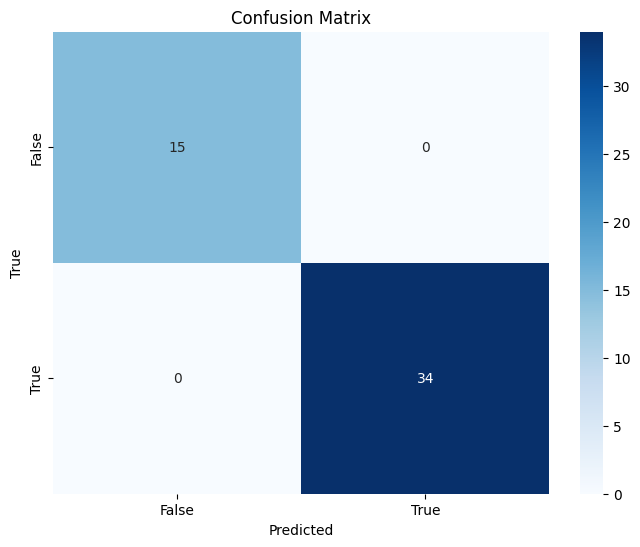

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the tips dataset
tips_df = sns.load_dataset("tips")

# Perform one-hot encoding
tips_df = pd.get_dummies(tips_df, columns=['time', 'sex', 'smoker', 'day'])

# Split the dataset into features (X) and target variable (y)
X = tips_df.drop('time_Dinner', axis=1)  # Avoiding dummy variable trap
y = tips_df['time_Dinner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
print(tips.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
